# Import Necessary Libraries

In [2]:
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

 #foundational package for scientific computing
import numpy as np

#collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas as pd

#collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns

#collection of functions for scientific computing and advance mathematics
import scipy as sp

#collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [5]:
 datatrain =  pd.read_csv('Iris.csv')

# Exploratory Data Analysis (EDA)

In [6]:
#Check some data
datatrain.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Shape of the Dataset
datatrain.shape

(150, 6)

In [8]:
#Information about the Dataset
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Cleaning

In [10]:
#Missing values
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))


Train columns with null values: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 



In [11]:
#description of Dataset
datatrain.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualization

<AxesSubplot:xlabel='Species', ylabel='count'>

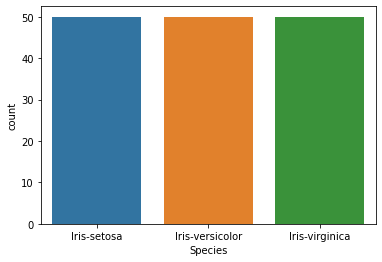

In [12]:
sns.countplot(x="Species", data=datatrain)  # How many people survived

<AxesSubplot:xlabel='Species', ylabel='count'>

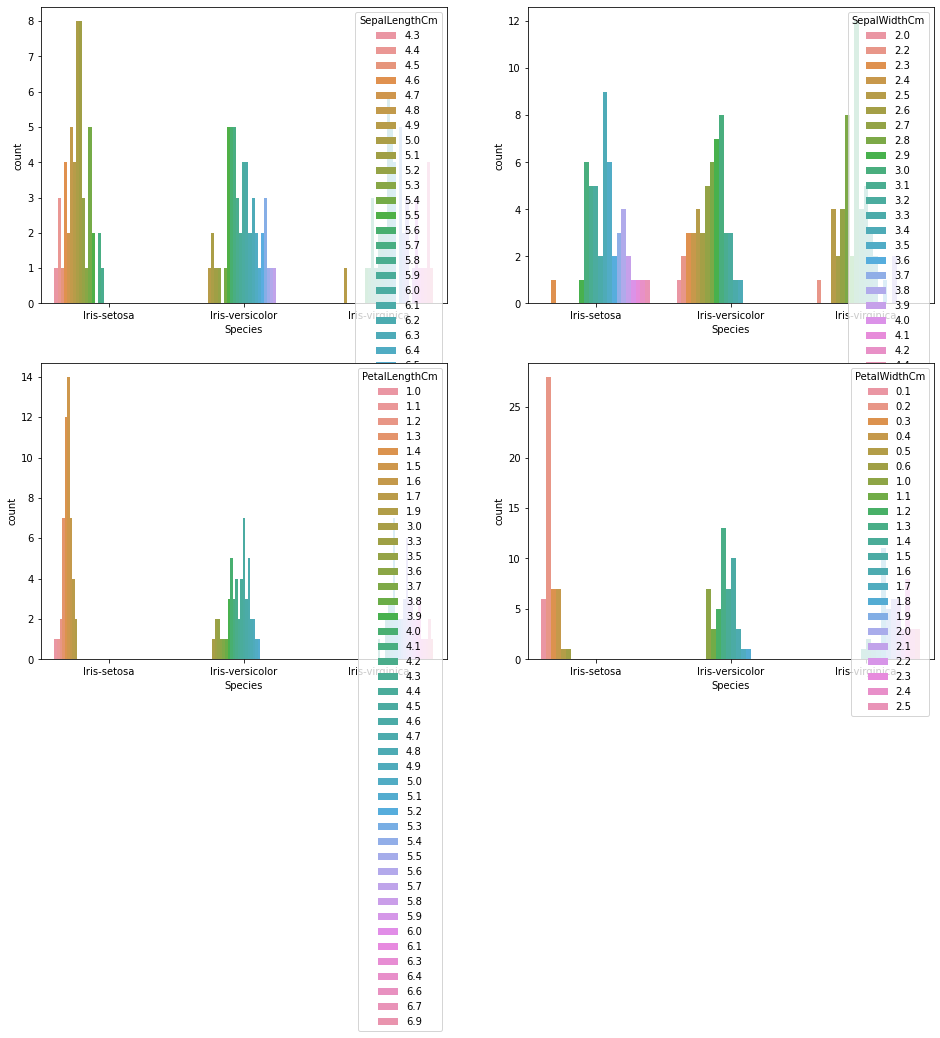

In [13]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Species', hue="SepalLengthCm", data=datatrain,ax = saxis[0,0])   
sns.countplot(x='Species', hue="SepalWidthCm", data=datatrain,ax = saxis[0,1])
sns.countplot(x="Species", hue="PetalLengthCm", data=datatrain, ax = saxis[1,0])
sns.countplot(x="Species", hue="PetalWidthCm", data=datatrain, ax = saxis[1,1])


<AxesSubplot:>

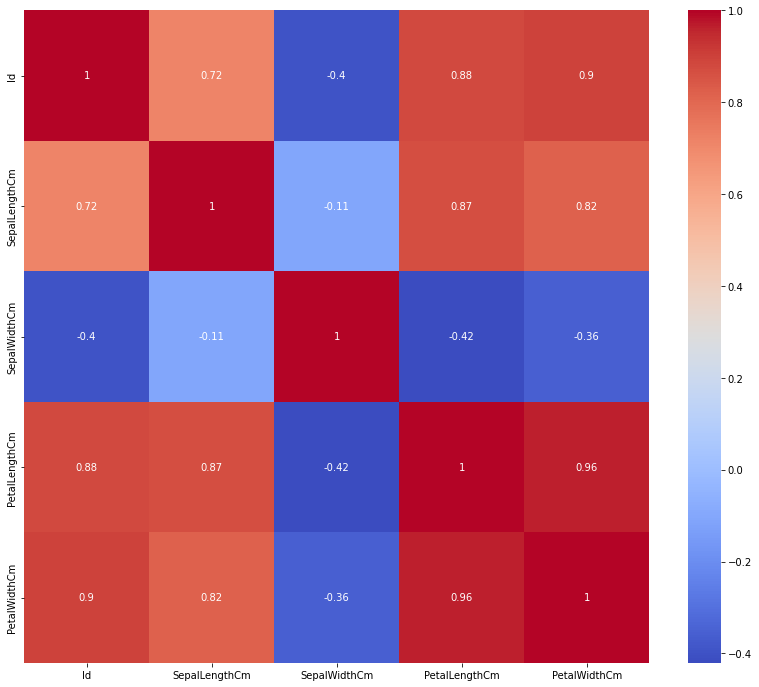

In [14]:
#Heatmap
plt.subplots(figsize =(14, 12))
correlation = datatrain.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm')

# Code Categorical Data

In [15]:
#code categorical data
label = LabelEncoder()
datatrain['Species'] = label.fit_transform(datatrain['Species'])

In [16]:
datatrain["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [17]:
X=datatrain.drop(['Species'],axis=1)
y=datatrain['Species']

# Apply Algorithms

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

## 1)Decision Tree

In [19]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_predL = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predL))
print(confusion_matrix(y_test, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,y_test))

DT = accuracy_score(y_predL,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]
accuracy is 1.0


## 2) Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train, y_train)
y_predR = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_predR))
print(confusion_matrix(y_predR,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predR,y_test))

RT = accuracy_score(y_predR,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]
accuracy is  1.0


## 3) Logistic Regression 

In [21]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)
y_predLR = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predLR))
print(confusion_matrix(y_test, y_predLR))
# Accuracy score
print('accuracy is',accuracy_score(y_predLR,y_test))

LR = accuracy_score(y_predLR,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]
accuracy is 1.0
